# Homework II

##  Data preparation


Loading data

In [2]:
import pandas as pd, numpy as np

# read heart-disease data
df = pd.read_csv('heart-disease.csv')

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Data dummification

In [12]:
from sklearn.preprocessing import OneHotEncoder

# select columns to dummify
vars_to_dummify = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
X = df[vars_to_dummify]

# dummify columns
encoder = OneHotEncoder(handle_unknown='ignore') #handle_unknown='ignore', sparse=False, dtype=bool)
trans_X = encoder.fit_transform(X)
new_vars = encoder.get_feature_names_out(vars_to_dummify)
new_vars, trans_X, new_vars.shape, trans_X.shape~


(array(['sex_0', 'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1',
        'restecg_0', 'restecg_1', 'restecg_2', 'exang_0', 'exang_1',
        'slope_0', 'slope_1', 'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3',
        'ca_4', 'thal_0', 'thal_1', 'thal_2', 'thal_3'], dtype=object),
 <Compressed Sparse Row sparse matrix of dtype 'float64'
 	with 2424 stored elements and shape (303, 25)>,
 (25,),
 (303, 25))

In [15]:
print(trans_X)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2424 stored elements and shape (303, 25)>
  Coords	Values
  (0, 1)	1.0
  (0, 5)	1.0
  (0, 7)	1.0
  (0, 8)	1.0
  (0, 11)	1.0
  (0, 13)	1.0
  (0, 16)	1.0
  (0, 22)	1.0
  (1, 1)	1.0
  (1, 4)	1.0
  (1, 6)	1.0
  (1, 9)	1.0
  (1, 11)	1.0
  (1, 13)	1.0
  (1, 16)	1.0
  (1, 23)	1.0
  (2, 0)	1.0
  (2, 3)	1.0
  (2, 6)	1.0
  (2, 8)	1.0
  (2, 11)	1.0
  (2, 15)	1.0
  (2, 16)	1.0
  (2, 23)	1.0
  (3, 1)	1.0
  :	:
  (299, 24)	1.0
  (300, 1)	1.0
  (300, 2)	1.0
  (300, 7)	1.0
  (300, 9)	1.0
  (300, 11)	1.0
  (300, 14)	1.0
  (300, 18)	1.0
  (300, 24)	1.0
  (301, 1)	1.0
  (301, 2)	1.0
  (301, 6)	1.0
  (301, 9)	1.0
  (301, 12)	1.0
  (301, 14)	1.0
  (301, 17)	1.0
  (301, 24)	1.0
  (302, 0)	1.0
  (302, 3)	1.0
  (302, 6)	1.0
  (302, 8)	1.0
  (302, 11)	1.0
  (302, 14)	1.0
  (302, 17)	1.0
  (302, 23)	1.0


In [14]:
df_dummified = df.copy()

# append dummified columns
df_dummified.drop(vars_to_dummify, axis = 1, inplace=True)
df_dummified

df_dummified[new_vars] = pd.DataFrame(trans_X, columns=new_vars)
df_dummified.head()

,age,trestbps,chol,thalach,oldpeak,target
0,63,145,233,150,2.3,1
1,37,130,250,187,3.5,1
2,41,130,204,172,1.4,1
3,56,120,236,178,0.8,1
4,57,120,354,163,0.6,1
...,...,...,...,...,...,...
298,57,140,241,123,0.2,0
299,45,110,264,132,1.2,0
300,68,144,193,141,3.4,0
301,57,130,131,115,1.2,0


### Cross-validation used in this problem



In [ ]:
from sklearn.model_selection import StratifiedKFold

# applying 5-fold cross-validation with shuffling

acc_folds = []
folds = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)

# iterate per fold
for train_k, test_k in folds.split(X, y):
    X_train, X_test = X.iloc[train_k], X.iloc[test_k]
    y_train, y_test = y.iloc[train_k], y.iloc[test_k]
    
    # train and assess
    predictor.fit(X_train, y_train)
    y_pred = predictor.predict(X_test)
    acc_folds.append(round(metrics.accuracy_score(y_test, y_pred),2))
    
print("Fold accuracies:", acc_folds)

Here predictor is used but for the actual code we will define our models as knn and nbc, meaning KNN and naive bayes classifier. 

## 1) KNN vs naive Bayes 


### Setting the models

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# KNN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Naive Bayes classifier
nbc = GaussianNB()

Separating input from output data


In [3]:
X = df.drop('target', axis=1)
y = df['target']

X,y

(     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 0     63    1   3       145   233    1        0      150      0      2.3   
 1     37    1   2       130   250    0        1      187      0      3.5   
 2     41    0   1       130   204    0        0      172      0      1.4   
 3     56    1   1       120   236    0        1      178      0      0.8   
 4     57    0   0       120   354    0        1      163      1      0.6   
 ..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
 298   57    0   0       140   241    0        1      123      1      0.2   
 299   45    1   3       110   264    0        1      132      0      1.2   
 300   68    1   0       144   193    1        1      141      0      3.4   
 301   57    1   0       130   131    0        1      115      1      1.2   
 302   57    0   1       130   236    0        0      174      0      0.0   
 
      slope  ca  thal  
 0        0   0     1  
 1        0   0     2  
 2

### a)  Boxplots with fold accuracies

In [16]:
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold

# applying 5-fold cross-validation with shuffling

folds = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
acc_folds_knn = []

# iterate per fold usisng KNN
for train_k, test_k in folds.split(X, y):
    X_train, X_test = X.iloc[train_k], X.iloc[test_k]
    y_train, y_test = y.iloc[train_k], y.iloc[test_k]
    
    # train and assess
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc_folds_knn.append(round(metrics.accuracy_score(y_test, y_pred),2))
    
print("KNN fold accuracies:", acc_folds_knn)

# iterate per fold using Naive Bayes
acc_folds_nbc = []

# iterate per fold usisng Naive Bayes
for train_k, test_k in folds.split(X, y):
    X_train, X_test = X.iloc[train_k], X.iloc[test_k]
    y_train, y_test = y.iloc[train_k], y.iloc[test_k]
    
    # train and assess
    nbc.fit(X_train, y_train)
    y_pred = nbc.predict(X_test)
    acc_folds_nbc.append(round(metrics.accuracy_score(y_test, y_pred),2))
    
print("Naive bayes fold accuracies:", acc_folds_nbc)



KNN fold accuracies: [0.62, 0.57, 0.67, 0.7, 0.7]
Naive bayes fold accuracies: [0.89, 0.8, 0.8, 0.85, 0.83]


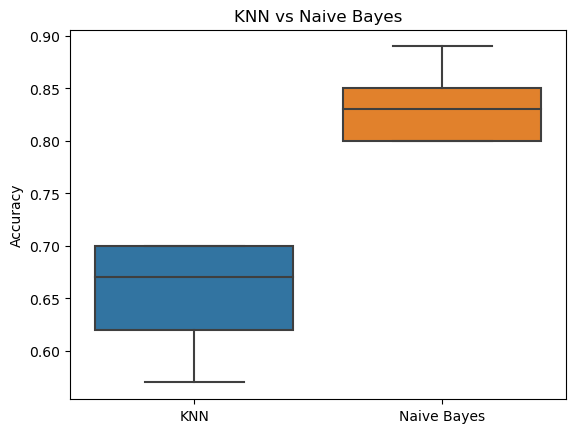

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# plot boxplot

sns.boxplot(data=[acc_folds_knn, acc_folds_nbc], notch=True)
plt.ylabel('Accuracy')
plt.xticks([0,1], ['KNN', 'Naive Bayes'])
plt.title('KNN vs Naive Bayes')
plt.show()


The KNN model does not work as well because we have not scalled any of the data, meaning the distance calculations can be wrongfully weighing variables because they have higher absolute values

### b)  Accuracy of the models with scaling

In [17]:
from sklearn.preprocessing import MinMaxScaler

# copy the dataframe and scale the numerical columns
df_scaled = df.copy()
df_scaled[['age','trestbps','chol','thalach','oldpeak']] = MinMaxScaler().fit_transform(df[['age','trestbps','chol','thalach','oldpeak']])
df_scaled.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1,3,0.481132,0.244292,1,0,0.603053,0,0.370968,0,0,1,1
1,0.166667,1,2,0.339623,0.283105,0,1,0.885496,0,0.564516,0,0,2,1
2,0.250000,0,1,0.339623,0.178082,0,0,0.770992,0,0.225806,2,0,2,1
3,0.562500,1,1,0.245283,0.251142,0,1,0.816794,0,0.129032,2,0,2,1
4,0.583333,0,0,0.245283,0.520548,0,1,0.702290,1,0.096774,2,0,2,1


In [18]:
# Accuracy of KNN and Naive Bayes with scaled data
X = df_scaled.drop('target', axis=1)
y = df_scaled['target']

acc_folds_knn = []

# iterate per fold usisng KNN
for train_k, test_k in folds.split(X, y):
    X_train, X_test = X.iloc[train_k], X.iloc[test_k]
    y_train, y_test = y.iloc[train_k], y.iloc[test_k]
    
    # train and assess
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc_folds_knn.append(round(metrics.accuracy_score(y_test, y_pred),2))
    
print("KNN fold accuracies:", acc_folds_knn)

# iterate per fold using Naive Bayes
acc_folds_nbc = []

# iterate per fold usisng Naive Bayes
for train_k, test_k in folds.split(X, y):
    X_train, X_test = X.iloc[train_k], X.iloc[test_k]
    y_train, y_test = y.iloc[train_k], y.iloc[test_k]
    
    # train and assess
    nbc.fit(X_train, y_train)
    y_pred = nbc.predict(X_test)
    acc_folds_nbc.append(round(metrics.accuracy_score(y_test, y_pred),2))
    
print("Naive bayes fold accuracies:", acc_folds_nbc)


KNN fold accuracies: [0.87, 0.82, 0.85, 0.8, 0.83]
Naive bayes fold accuracies: [0.89, 0.8, 0.8, 0.85, 0.83]


KNN accuracy improves a lot as expected since now the distance metric it uses starts to make more sense (every variable can contribute) and Naive bayes is unchanging since scalling is irrelevant to it because it uses probabilities and regardless of the data's values if the proportions are conserved so is the bayesian probability

### Testing standard scaling

In [19]:
from sklearn.preprocessing import StandardScaler

# copy the dataframe and scale the numerical columns
df_scaled_std = df.copy()
df_scaled_std[['age','trestbps','chol','thalach','oldpeak']] = StandardScaler().fit_transform(df[['age','trestbps','chol','thalach','oldpeak']])
df_scaled_std.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1


In [20]:
# Accuracy of KNN and Naive Bayes with scaled data with standard scaler
X = df_scaled_std.drop('target', axis=1)
y = df_scaled_std['target']

acc_folds_knn = []

# iterate per fold usisng KNN
for train_k, test_k in folds.split(X, y):
    X_train, X_test = X.iloc[train_k], X.iloc[test_k]
    y_train, y_test = y.iloc[train_k], y.iloc[test_k]
    
    # train and assess
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc_folds_knn.append(round(metrics.accuracy_score(y_test, y_pred),2))
    
print("KNN fold accuracies:", acc_folds_knn)

# iterate per fold using Naive Bayes
acc_folds_nbc = []

# iterate per fold usisng Naive Bayes
for train_k, test_k in folds.split(X, y):
    X_train, X_test = X.iloc[train_k], X.iloc[test_k]
    y_train, y_test = y.iloc[train_k], y.iloc[test_k]
    
    # train and assess
    nbc.fit(X_train, y_train)
    y_pred = nbc.predict(X_test)
    acc_folds_nbc.append(round(metrics.accuracy_score(y_test, y_pred),2))
    
print("Naive bayes fold accuracies:", acc_folds_nbc)


KNN fold accuracies: [0.85, 0.79, 0.8, 0.8, 0.85]
Naive bayes fold accuracies: [0.89, 0.8, 0.8, 0.85, 0.83]


### c) statistical superiority

In [25]:
import scipy.stats as stats

# perform t-test
t_stat, p_val = stats.ttest_rel(acc_folds_knn, acc_folds_nbc)

# Output results
print(f"kNN mean accuracy: {np.mean(acc_folds_knn):.4f}")
print(f"Naïve Bayes mean accuracy: {np.mean(acc_folds_nbc):.4f}")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_val:.4f}")


kNN mean accuracy: 0.8180
Naïve Bayes mean accuracy: 0.8340
t-statistic: -1.2418
p-value: 0.2821


Difference in performance is not statiscially significance since the p-value of the test is > 0.05 which is the commonly used value for significance. Therefore we do not have enough information to say that either KNN or naive Bayes is more significant in this case.

## 2) 80-20 test split KNN

### a) Train and test accuracies

In [26]:
# Non scalled data
X, y = df.drop('target', axis=1), df['target']

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y)
print("#training obs =",len(X_train),"\n#testing obs =",len(X_test))

#training obs = 242 
#testing obs = 61


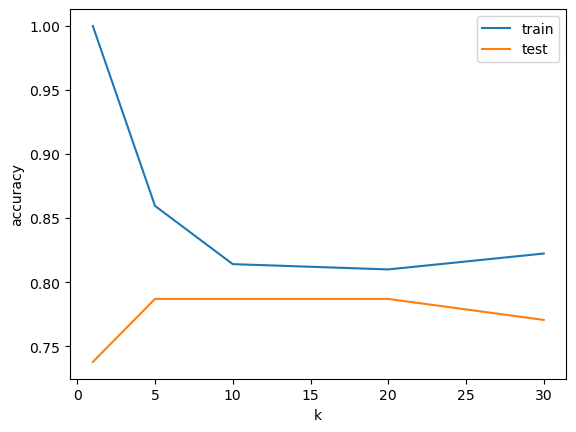

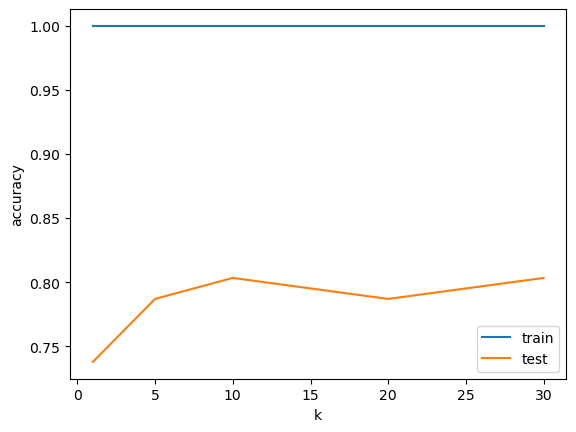

In [48]:
def plot_knn_uniform_accuracy(X_train, X_test, y_train, y_test):
    k = [1,5,10,20,30]
    train_acc, test_acc = [], []

    for i in k:
        knn = KNeighborsClassifier(n_neighbors=i, weights='uniform')
        knn.fit(X_train, y_train)
        train_acc.append(knn.score(X_train, y_train))
        test_acc.append(knn.score(X_test, y_test))


    # plot the results
    plt.plot(k, train_acc, label='train')
    plt.plot(k, test_acc, label='test')
    plt.xlabel('k')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()

def plot_knn_distance_accuracy(X_train, X_test, y_train, y_test):
    k = [1,5,10,20,30]
    train_acc, test_acc = [], []

    for i in k:
        knn = KNeighborsClassifier(n_neighbors=i, weights='distance')
        knn.fit(X_train, y_train)
        train_acc.append(knn.score(X_train, y_train))
        test_acc.append(knn.score(X_test, y_test))


    # plot the results
    plt.plot(k, train_acc, label='train')
    plt.plot(k, test_acc, label='test')
    plt.xlabel('k')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()

plot_knn_uniform_accuracy(X_train, X_test, y_train, y_test)
plot_knn_distance_accuracy(X_train, X_test, y_train, y_test)


In [ ]:
# plot knn using uniform weights and distance weights


### testing with scaled data

In [49]:
X = df_scaled.drop('target', axis=1)
y = df_scaled['target']

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y)
print("#training obs =",len(X_train),"\n#testing obs =",len(X_test))

#training obs = 242 
#testing obs = 61


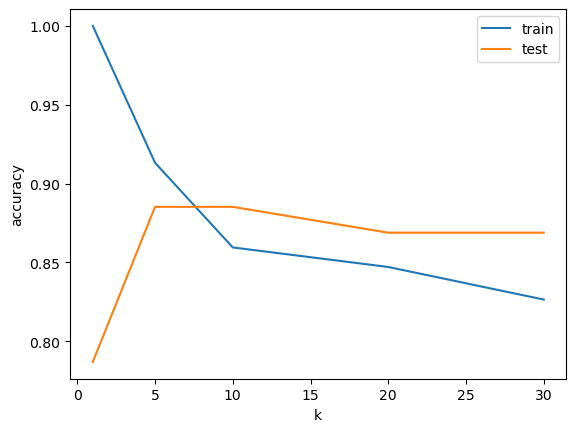

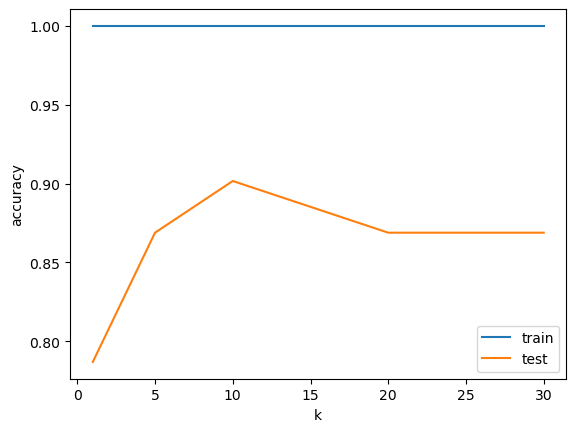

In [51]:
plot_knn_uniform_accuracy(X_train, X_test, y_train, y_test)
plot_knn_distance_accuracy(X_train, X_test, y_train, y_test)

In [52]:
X = df_scaled_std.drop('target', axis=1)
y = df_scaled_std['target']

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y)
print("#training obs =",len(X_train),"\n#testing obs =",len(X_test))

#training obs = 242 
#testing obs = 61


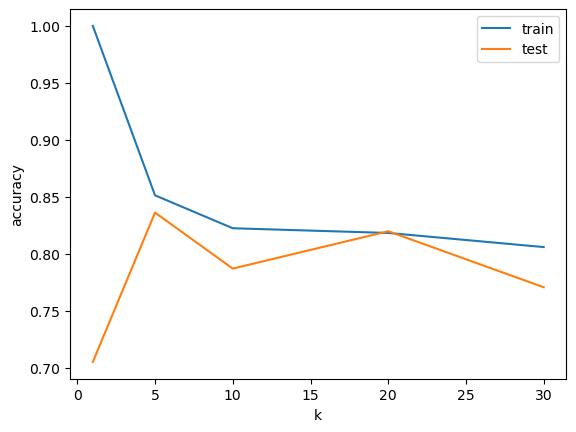

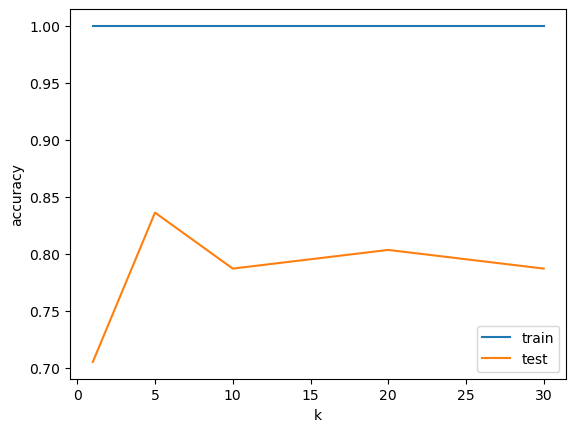

In [55]:
plot_knn_uniform_accuracy(X_train, X_test, y_train, y_test)
plot_knn_distance_accuracy(X_train, X_test, y_train, y_test)

Clearly knn deals better win minmax than with standard scaler.

### b) Impacts of higher K

Increasing the number of neighbors in KNN can improve generalization by reducing sensitivity to noise (lower variance), but if taken too far, it may cause underfitting (high bias). The ideal value of k provides a balance where the model generalizes well, typically found by validation techniques such as cross-validation.
!!!!!!!!!!!**Trocar**


## 3) Difficulties of naive Bayes

### Independence of variables

One of the most common difficulties with naive Bayes is the fact we are assuming the variables are independent. In this case since we are looking at health markers and screening for heart disease it is very unlikely the variables are indeed independent. To test this I will plot the correlation matrix of the dataset.

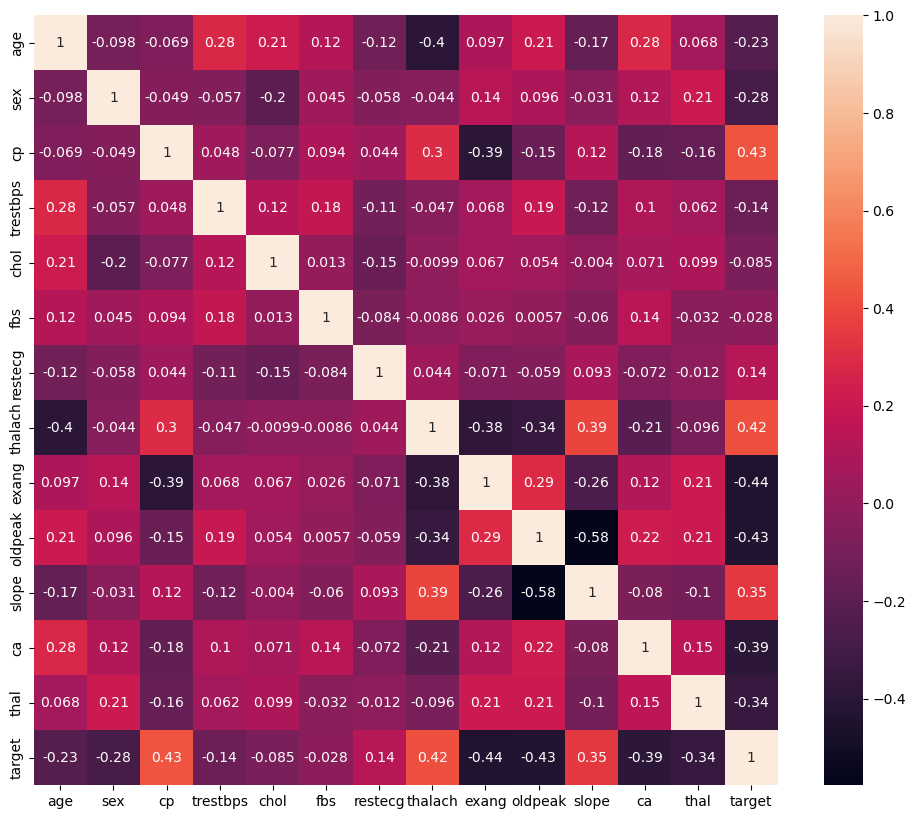

In [45]:
#plotting correlation matrix

plt.figure(figsize=(12, 10))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(method='pearson'), annot=True)
plt.show()

It is also irrelevant that the non-scaled correlation matrix is the same as the scaled one. To prove I will also plot the scalled one underneath.

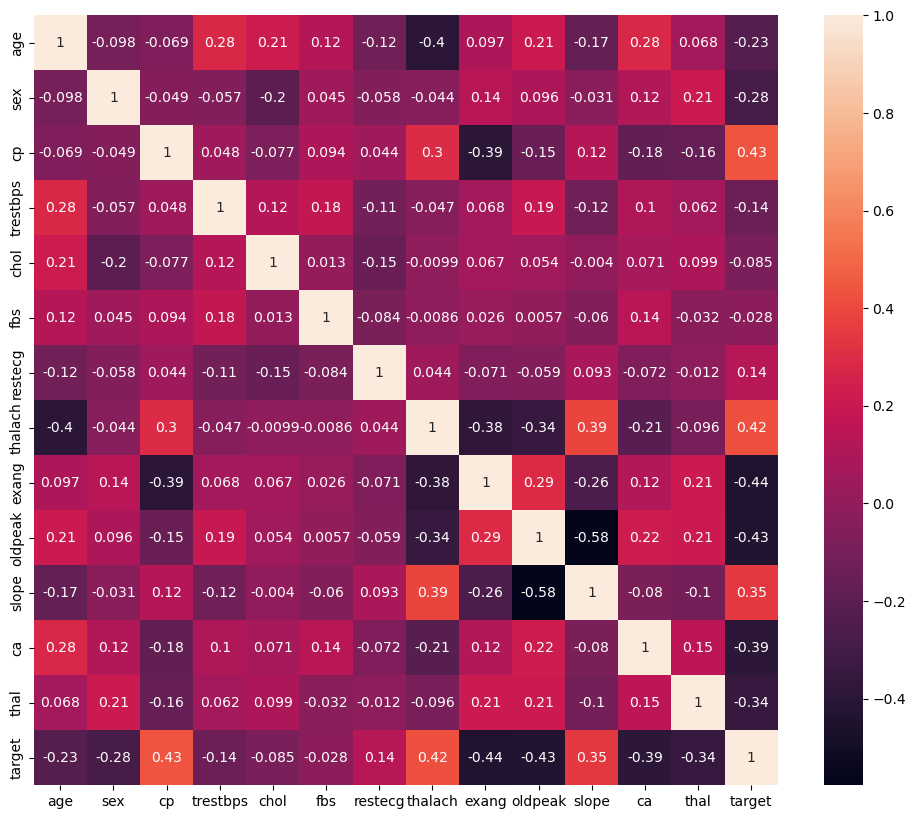

In [46]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_scaled.select_dtypes(include=[np.number]).corr(method='pearson'), annot=True)
plt.show()

Clearly the variables are far from independent since it is common to see correlations arround -0.35 in this dataset

### Outliars

In [ ]:
# Checking data for outliers using interquartile range 
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()



